# Imports

In [84]:
import numpy as np
import pprint

import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import expand_dims
from tensorflow.keras.utils import to_categorical


# Libs options

In [41]:
#np.set_printoptions(threshold=16)
pp = pprint.PrettyPrinter(indent=4, width=90)

# Dataset

In [66]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")
print("train/valid:", X_train.shape, y_train.shape)
print("test:", X_test.shape, y_test.shape)

train/valid: (60000, 28, 28) (60000,)
test: (10000, 28, 28) (10000,)


In [73]:
list(X_train[0][14])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 81, 240, 253, 253, 119, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0]

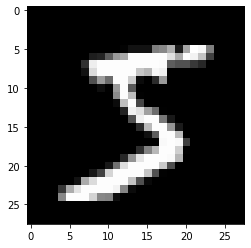

In [68]:
plt.imshow(X_train[0], cmap='gray');


In [75]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train[0].shape

(28, 28, 1)

# To categorical

In [16]:
labels = ["0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9"]

In [56]:
y_train_cat = to_categorical(y_train, num_classes=10, dtype ="uint8")
y_test_cat = to_categorical(y_test, num_classes=10, dtype ="uint8")
print("y_train_cat.shape =",y_train_cat.shape)
print("y_test_cat.shape =", y_test_cat.shape)
pp.pprint(y_train_cat[0])

y_train_cat.shape = (60000, 10)
y_test_cat.shape = (10000, 10)
array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)


label is: 6


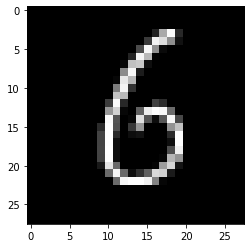

In [59]:
def categorical_to_id(arr):
    sum = 0
    for i in range(len(arr)):
        if arr[i]: return i
    return -1

item = 18

print("label is:", categorical_to_id(y_train_cat[item]))
plt.imshow(X_train[item], cmap='gray')
plt.show()

In [78]:
def get_model(X):
    model = models.Sequential()
    
    model.add(layers.Conv2D(8, (4,4), activation='relu', padding='same', input_shape=X[0].shape))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

model = get_model(X_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 8)         136       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

# Train 

In [80]:
es = EarlyStopping(patience = 5)

history = model.fit(X_train, 
                    y_train_cat,
                    validation_split = 0.3, # auto val generation
                    batch_size = 32,
                    epochs = 5,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/5
1313/1313 [==============================] - 29s 21ms/step - loss: 2.1194 - accuracy: 0.2045 - val_loss: 2.0196 - val_accuracy: 0.2089
Epoch 2/5
1313/1313 [==============================] - 27s 20ms/step - loss: 1.9956 - accuracy: 0.2122 - val_loss: 1.9880 - val_accuracy: 0.2136
Epoch 3/5
1313/1313 [==============================] - 29s 22ms/step - loss: 1.9589 - accuracy: 0.2284 - val_loss: 1.8761 - val_accuracy: 0.2714
Epoch 4/5
1313/1313 [==============================] - 29s 22ms/step - loss: 1.5289 - accuracy: 0.4157 - val_loss: 1.2522 - val_accuracy: 0.5372
Epoch 5/5
1313/1313 [==============================] - 27s 20ms/step - loss: 0.7107 - accuracy: 0.7667 - val_loss: 0.4046 - val_accuracy: 0.8663


# Plot results

In [131]:
def plot_history(history, labels = ["loss"]):
    h = history.history
    with plt.style.context('seaborn-deep'):
        fig, ax = plt.subplots(1, max(2,len(labels)), figsize=(15, 4))
        x_axis = np.arange(len(h[labels[0]]))
        for i in range(len(labels)):
            l = labels[i]
            L = l.capitalize()
            ax[i].set_title(l)
            ax[i].plot(x_axis, h[l], color="blue", linestyle=":", marker="X", label="Train "+L)
            ax[i].plot(x_axis, h['val_'+l], color="orange", linestyle="-", marker="X", label="Val "+L)
            ax[i].grid(axis="x", linewidth=0.5)
            ax[i].grid(axis="y", linewidth=0.5)
            ax[i].legend()
        plt.show()

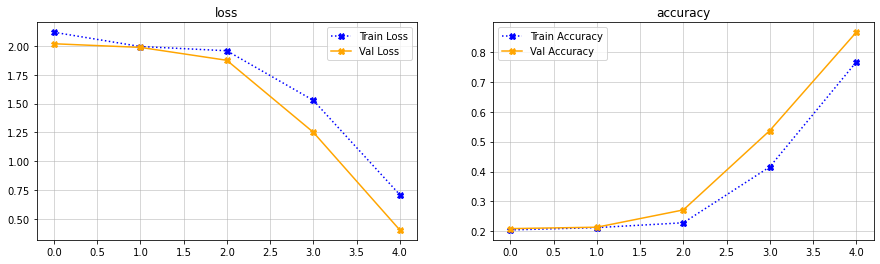

In [130]:
plot_history(history, ["loss", "accuracy"])

In [82]:
res = model.evaluate(X_test, y_test_cat, verbose = 1)
print(f'The accuracy on the test set is of {res[1]*100:.2f} %')

313/313 [==============================] - 3s 9ms/step - loss: 0.4009 - accuracy: 0.8693
The accuracy on the test set is of 86.93 %
